In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


In [2]:
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Using Shape function to find out the number of entries in the dataset and the number of columns

In [3]:
data.shape

(9994, 13)

Finding null values in the dataset

In [4]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

The dataset has no null or missing values

In [5]:
data.duplicated().sum()

17

In [6]:
data = data.drop_duplicates()
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [7]:
data = data.drop(columns=['Country', 'Postal Code'], axis=1)
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Now that we have the required dataset, we will begin with data exploration

<h1>DATA ANALYSIS</h1>

In [8]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


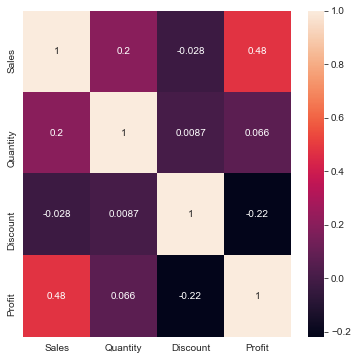

In [9]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(), annot=True)
plt.show()

<h3>Profit-Loss Summary

<AxesSubplot:title={'center':'Profit-Loss Split'}, ylabel='Percentage'>

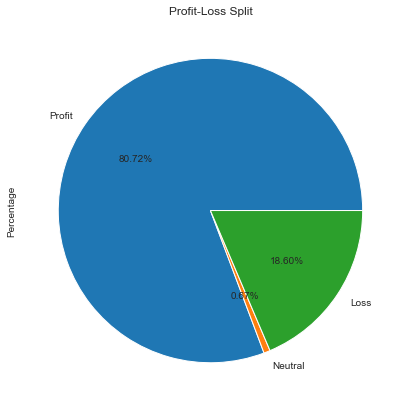

In [10]:
profit_loss = pd.DataFrame({'Profit': data.Quantity[data.Profit>0].sum(),
                           'Neutral': data.Quantity[data.Profit==0].sum(),
                           'Loss': data.Quantity[data.Profit<0].sum()},
                          index={'Count'}).T
plt.title('Profit-Loss Split')
profit_loss.Count.plot.pie(autopct="%1.2f%%", 
                           figsize=(7,7),
                           label = "Percentage"
                           )



<h3>Profit by Shipping Mode, Segment and Region

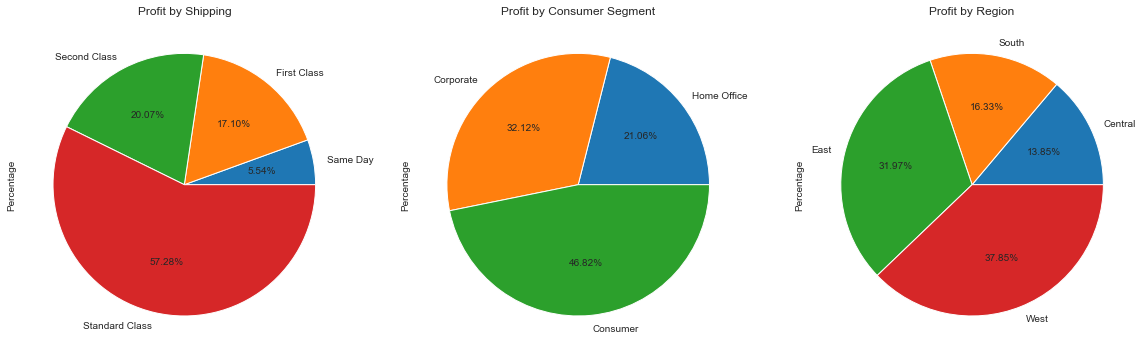

In [11]:
ship_pft = pd.DataFrame(data.groupby('Ship Mode').sum()).sort_values('Profit')
segment_pft = pd.DataFrame(data.groupby('Segment').sum()).sort_values('Profit')
region_pft = pd.DataFrame(data.groupby('Region').sum()).sort_values('Profit')
fig, ax = plt.subplots(1,3, figsize=(20,15))
ax[0].set_title('Profit by Shipping')
ax[1].set_title('Profit by Consumer Segment')
ax[2].set_title('Profit by Region')
ship_pft.Profit.plot.pie(autopct="%1.2f%%", 
                        label = "Percentage",
                         ax=ax[0]
                        )
segment_pft.Profit.plot.pie(autopct="%1.2f%%", 
                        label = "Percentage",
                            ax=ax[1]
                        )
region_pft.Profit.plot.pie(autopct="%1.2f%%", 
                        label = "Percentage",
                           ax=ax[2]
                        )
plt.show()

<h3>Profit by Category


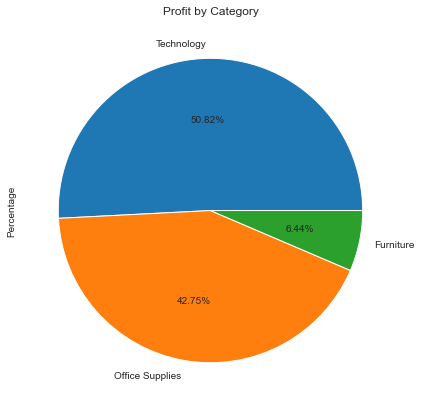

In [12]:
category_pft = np.round(data.groupby('Category').sum(), decimals=2).sort_values('Profit', ascending=False)
plt.title('Profit by Category')
category_pft.Profit.plot.pie(autopct = "%1.2f%%", label='Percentage', figsize=(7,7))
plt.show()

<h3>Sales by Category and Sub-Category

Total Number of Items Sold : 37820


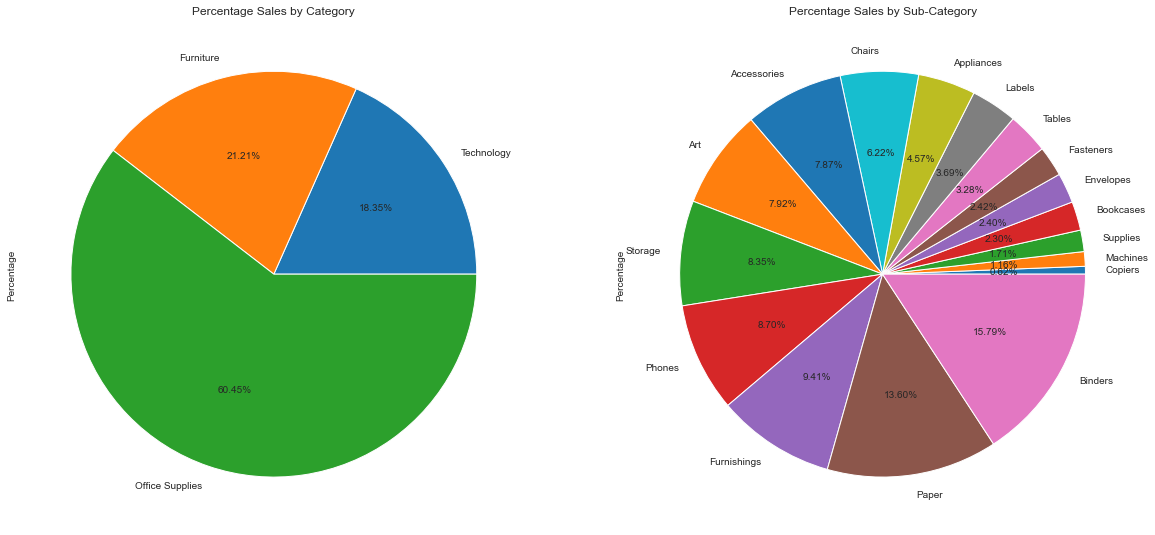

In [13]:
category_sales = data.groupby('Category').sum().iloc[:,1].sort_values().to_frame('Count')
subcat_sales = data.groupby('Sub-Category').sum().iloc[:,1].sort_values().to_frame('Count')

print("Total Number of Items Sold : {}".format(data.Quantity.sum()))

fig, ax = plt.subplots(1,2, figsize=(20, 15))
ax[0].set_title('Percentage Sales by Category')
ax[1].set_title('Percentage Sales by Sub-Category')

category_sales.Count.plot.pie(autopct = "%1.2f%%", label="Percentage", ax=ax[0])
subcat_sales.Count.plot.pie(autopct="%1.2f%%", label="Percentage", ax=ax[1])
plt.show()

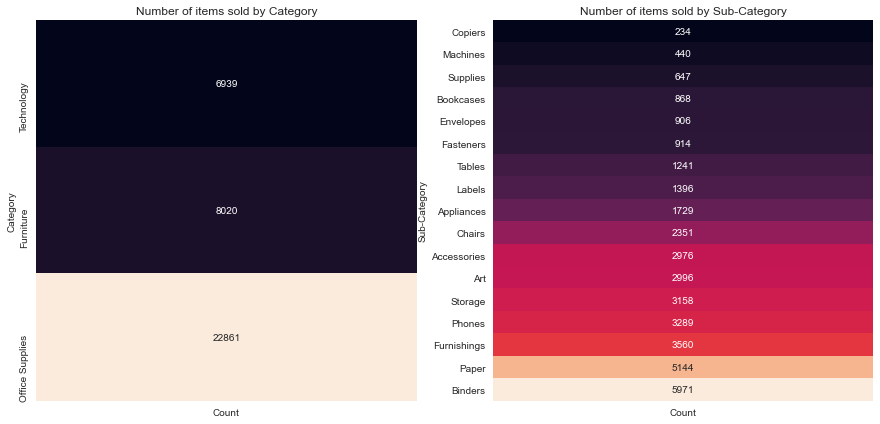

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15, 7))
ax[0].set_title("Number of items sold by Category")
ax[1].set_title("Number of items sold by Sub-Category")

sns.heatmap(category_sales, ax=ax[0], cbar=False, annot=True, fmt='2')
sns.heatmap(subcat_sales, ax=ax[1], cbar=False, annot=True, fmt='2')
plt.show()

<h3>Profit loss by individual category

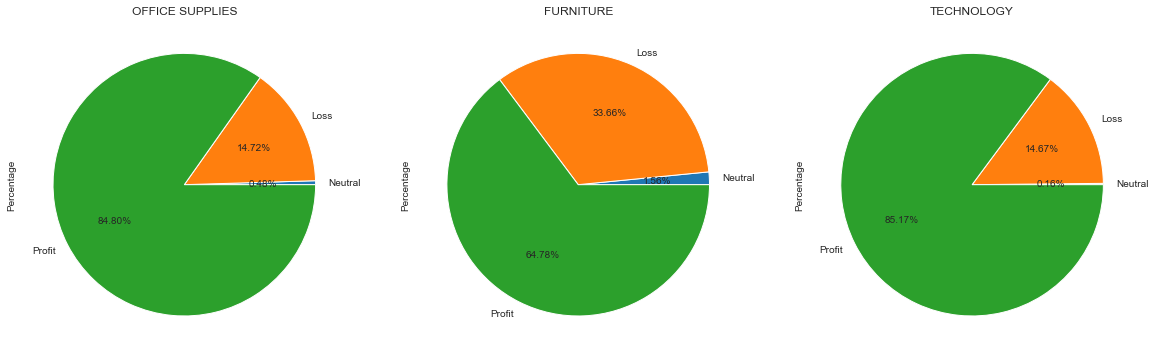

In [15]:
office_sales = pd.DataFrame({'Profit' : data[(data.Category == "Office Supplies") & (data.Profit>0)].count()[0],
                             'Neutral' : data[(data.Category == "Office Supplies") & (data.Profit==0)].count()[0],
                             'Loss' : data[(data.Category == "Office Supplies") & (data.Profit<0)].count()[0]}, index={"Percentage"}).T.sort_values('Percentage')

furniture_sales = pd.DataFrame({'Profit' : data[(data.Category == "Furniture") & (data.Profit>0)].count()[0],
                                'Neutral' : data[(data.Category == "Furniture") & (data.Profit==0)].count()[0],
                                'Loss' : data[(data.Category == "Furniture") & (data.Profit<0)].count()[0]}, index={"Percentage"}).T.sort_values('Percentage')

technology_sales = pd.DataFrame({'Profit' : data[(data.Category == "Technology") & (data.Profit>0)].count()[0],
                                 'Neutral' : data[(data.Category == "Technology") & (data.Profit==0)].count()[0],
                                 'Loss' : data[(data.Category == "Technology") & (data.Profit<0)].count()[0]}, index={"Percentage"}).T.sort_values('Percentage')


fig, ax = plt.subplots(1,3, figsize=(20,15))
ax[0].set_title("OFFICE SUPPLIES")
ax[1].set_title("FURNITURE")
ax[2].set_title("TECHNOLOGY")

office_sales.Percentage.plot.pie(autopct="%1.2f%%", ax=ax[0])
furniture_sales.Percentage.plot.pie(autopct="%1.2f%%", ax=ax[1])
technology_sales.Percentage.plot.pie(autopct="%1.2f%%", ax=ax[2])

plt.show()

<h3>Profit by Sub-Category

C:\Users\vishv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


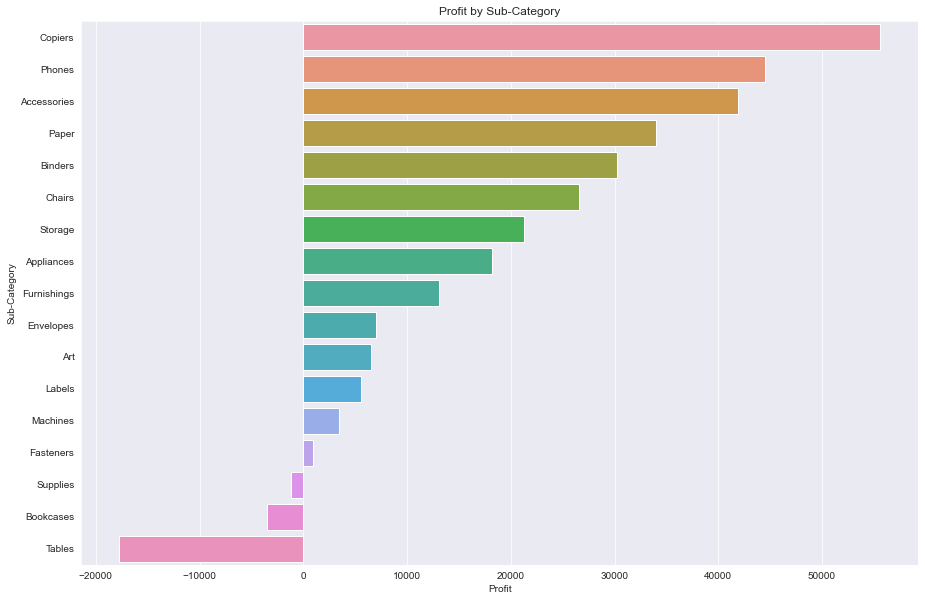

In [16]:
profit_sub = np.round(data.groupby('Sub-Category').sum(), decimals=2).sort_values('Profit', ascending=False)
plt.figure(figsize=(15,10))
plt.title("Profit by Sub-Category")
sns.barplot(profit_sub.Profit, profit_sub.index)
plt.show()

<h3>Profit by State

C:\Users\vishv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


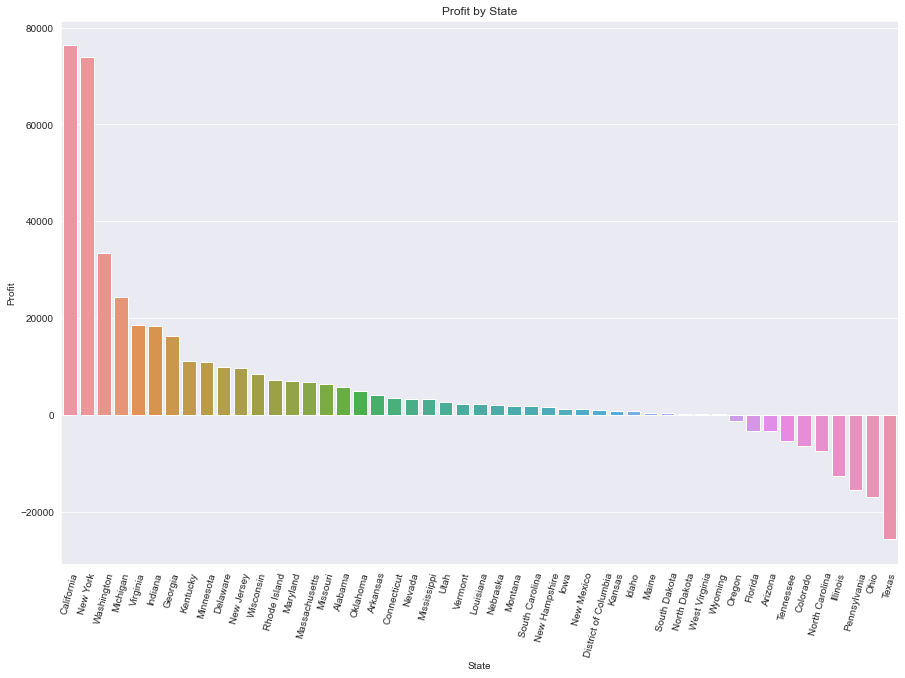

In [18]:
state_pft = pd.DataFrame(data.groupby('State').sum()).sort_values('Profit', ascending=False)
plt.figure(figsize=(15,10))
plt.title('Profit by State')
sns.barplot(state_pft.index, state_pft.Profit)
plt.xticks(rotation=75)
plt.show()